<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/education/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visão geral**

This notebook uses an UCI dataset:
https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Introduction Paper

Early prediction of student's performance in higher education: a case study
Mónica V. Martins, Daniel **Tolledo**, Jorge Machado, Luís M. T. Baptista, and Valentim Realinho

Trends and Applications in Information Systems and Technologies

https://archive.ics.uci.edu/ml/datasets/Student+Performance

Alternative:

https://archive.ics.uci.edu/ml/datasets/Higher+Education+Students+Performance+Evaluation+Dataset



# Obtenção dos dados

In [1]:
from io import BytesIO
from zipfile import ZipFile
import requests

# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
# dataset_file = 'student-mat.csv'
url = 'https://archive-beta.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip'
dataset_file = 'data.csv'
filename = requests.get(url).content
zip_file = ZipFile( BytesIO(filename), 'r' )

In [ ]:
import pandas as pd

df = pd.read_csv(zip_file.open(dataset_file),sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Entendimento dos dados

In [ ]:
# from sklearn.datasets import fetch_openml
# risk_dataset = fetch_openml(name=dataset,version='1')
# print(risk_dataset.DESCR)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Total de instances e features

In [ ]:
df.shape

(4424, 37)

## Classes

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

## Features, missing values e data types

In [ ]:
df.dtypes.value_counts()

int64      29
float64     7
object      1
dtype: int64

In [ ]:
int_features = df.select_dtypes(['int64']).columns.to_numpy()
float_features = df.select_dtypes(['float64']).columns.to_numpy()
print(int_features)
print(float_features)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance\t' 'Previous qualification' 'Nacionality'
 "Mother's qualification" "Father's qualification" "Mother's occupation"
 "Father's occupation" 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)'
 'Curricular units 2nd sem (without evaluations)']
['Previous qualification (grade)' 'Admission grade'
 'Curricular units 1st sem (grade)' 'Curricular units 2nd sem (grade)'
 'Unemployment rate' 'Inflation rate' 'GDP']


# Exploração de dados

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='Target')
fig.show()

In [ ]:
for column in int_features:
  fig = px.scatter(df, x=column, color='Target')
  fig.show()

In [ ]:
for column in float_features:
  fig = px.histogram(df, x=column, color='Target')
  fig.show()

In [ ]:
df_target = df['Target']
df_features = df.drop(columns='Target')
df_target

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

# Preparação de dados

## Codificação de classes para valores numéricos

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target = encoder.fit_transform(df_target)
target

array([0, 2, 0, ..., 0, 2, 2])

## Codificação de features categóricos para valores numéricos

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error',sparse=False)
data = pd.DataFrame(encoder.fit_transform(risk_dataset.data[category_features]))
data.columns = encoder.get_feature_names_out()
data

NameError: ignored

## Junção de features categóricas e numéricas

In [ ]:
data = pd.concat([risk_dataset.data[numeric_features], data], axis=1)
data

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Normalização das features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-1.24, -0.75,  0.92, ...,  1.21, -0.2 ,  0.2 ],
       [ 2.25,  0.95, -0.87, ..., -0.82, -0.2 ,  0.2 ],
       [-0.74, -0.42, -0.87, ..., -0.82, -0.2 ,  0.2 ],
       ...,
       [-0.74, -0.87,  0.92, ..., -0.82, -0.2 ,  0.2 ],
       [ 2.  , -0.51,  0.92, ...,  1.21, -0.2 ,  0.2 ],
       [ 2.  ,  0.46,  0.02, ..., -0.82, -0.2 ,  0.2 ]])

## Definição de função para exibição da ConfusionMatrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

class_names = risk_dataset.target.unique()
color_map = plt.cm.Blues
options = [
    ("Confusion matrix, denormalized", None),
    ("Confusion matrix, normalized", "true"),
]

def confusion_matrix_display(y_test, y_pred, options, method, display_labels, color_map):  
  for title, normalize in options:
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names,normalize=normalize,cmap=color_map)
    disp.ax_.set_title(method+' -  '+title)
  plt.show()


## Definição de função para coleta de métricas

In [ ]:
metrics_df = pd.DataFrame()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

def metrics_collect(method, y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  confusion_matrix_data = confusion_matrix(y_test, y_pred, normalize='true')
  metrics_data = {'method': method, 
                  'accuracy': accuracy, 
                  'precision': precision, 
                  'recall': recall, 
                  'f1': f1, 
                  'confusion_matrix': confusion_matrix_data }
  return metrics_data

## Definição de parâmetros para o GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

scoring='accuracy'
cv=10
n_jobs=-1

# Modelagem

## Separação dados de treinamento e testes

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 61)
(750,)
(250, 61)
(250,)


## Aplicação do método KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': range(1,9)}
clf = GridSearchCV(KNeighborsClassifier(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'n_neighbors': 6}


In [ ]:
method = 'KNN'
knn = KNeighborsClassifier(**clf.best_params_)
y_pred_knn = knn.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_knn)
metrics_df = metrics_df.append(metrics, ignore_index=True)

In [ ]:
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

## Aplicação do método LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

method = 'LDA'
lda = LinearDiscriminantAnalysis()
y_pred_lda = lda.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_lda)
metrics_df = metrics_df.append(metrics, ignore_index=True)

In [ ]:
lda.get_params(deep=True)

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

## Aplicação do método QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

method = 'QDA'
qda = QuadraticDiscriminantAnalysis()
y_pred_qda = qda.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_qda)
metrics_df = metrics_df.append(metrics, ignore_index=True)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



In [ ]:
qda.get_params(deep=True)

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

## Aplicação do método SVC

In [ ]:
from sklearn.svm import SVC

parameters = { 'kernel': ('linear', 'rbf'), 'C': [1,10], 'gamma': ('scale', 'auto') }
clf = GridSearchCV(SVC(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
method = 'SVC'
svc = SVC(**clf.best_params_)
y_pred_svc = svc.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_svc)
metrics_df = metrics_df.append(metrics, ignore_index=True)

In [ ]:
svc.get_params(deep=True)

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Aplicação do método MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# restrição de parâmetros devido a desempenho...
parameters = {'solver': ['lbfgs'], 'alpha': [0.0001, 0.0001], 'hidden_layer_sizes': [10,20], 'max_iter': [1000,1000]}
clf = GridSearchCV(MLPClassifier(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': 20, 'max_iter': 1000, 'solver': 'lbfgs'}


In [ ]:
method = 'MLP'
mlp = MLPClassifier(**clf.best_params_)
y_pred_mlp = mlp.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_mlp)
metrics_df = metrics_df.append(metrics, ignore_index=True)

In [ ]:
mlp.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 20,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Aplicação do método RFT

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': [200, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10] }
clf = GridSearchCV(RandomForestClassifier(), parameters, scoring=scoring, cv=cv, n_jobs=n_jobs)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}


In [ ]:
method = 'RFT'
rft = RandomForestClassifier(**clf.best_params_)
y_pred_rft = rft.fit(X_train,y_train).predict(X_test)
metrics = metrics_collect(method, y_test, y_pred_rft)
metrics_df = metrics_df.append(metrics, ignore_index=True)

In [ ]:
rft.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Avaliações

## Métricas diversas

In [ ]:
import plotly.express as px

fig = px.bar(metrics_df, x='method', y=['accuracy', 'precision','recall', 'f1'], barmode='group', text_auto='.2f', title='Metrics by method')
fig.show()

## Matriz de Confusão

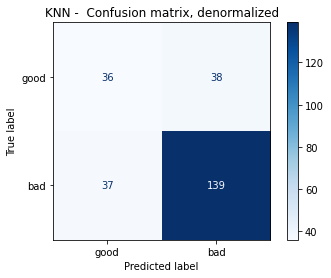

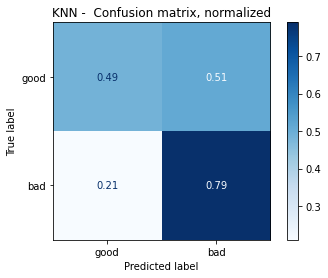

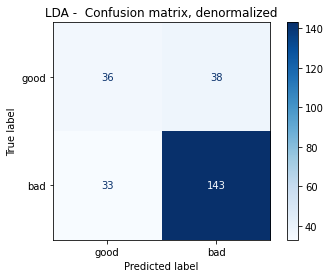

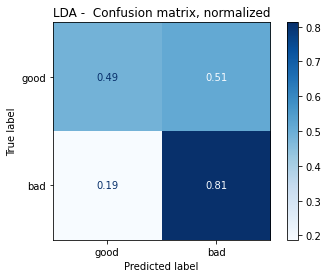

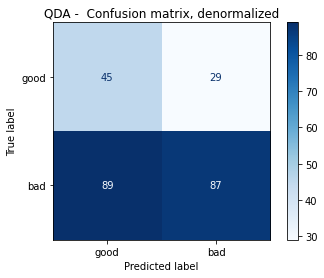

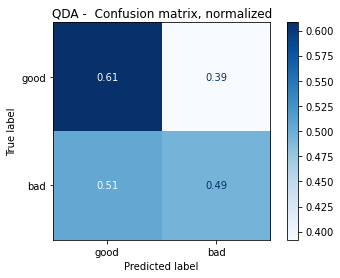

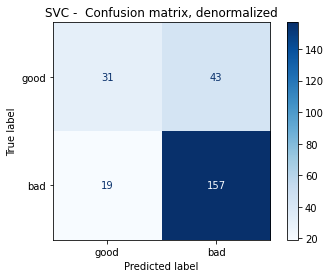

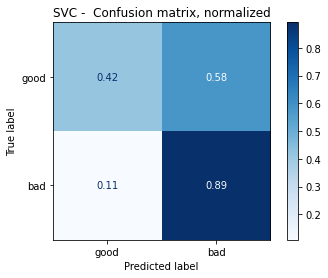

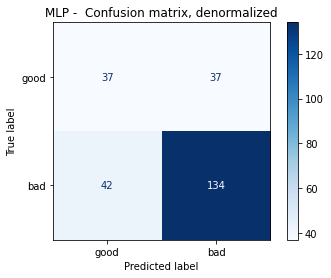

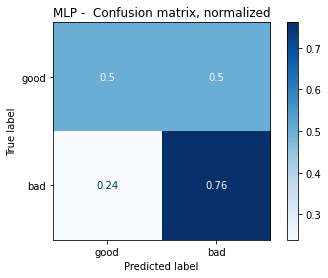

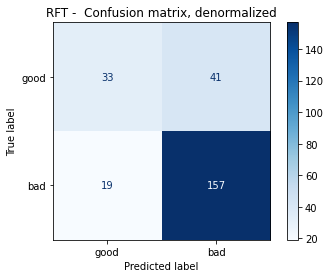

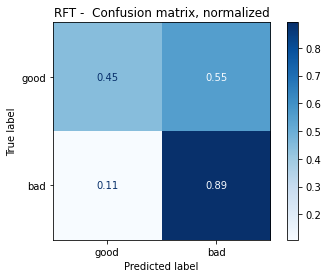

In [ ]:
import matplotlib.pyplot as plt

methods = [ ['KNN',  y_pred_knn ],
            ['LDA',  y_pred_lda ],
            ['QDA',  y_pred_qda ],
            ['SVC',  y_pred_svc ],
            ['MLP',  y_pred_mlp ],
            ['RFT',  y_pred_rft ] ]
for method, y_pred in methods:
  confusion_matrix_display(y_test, y_pred, options, method, class_names, color_map)

## Custos

In [ ]:
import numpy as np

cost_matrix = [ [0, 1], [5, 0] ]
costs = []
for ind in metrics_df.index:
    cost  = np.sum(np.multiply(cost_matrix, metrics_df['confusion_matrix'][ind]))
    costs.append(cost)
metrics_df['cost'] = costs

method_min_cost = metrics_df['method'][metrics_df['cost'].idxmin()]
print("Method with the minimun cost: ", method_min_cost)

Method with the minimun cost:  RFT
